In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df_jan = pd.read_parquet('yellow_tripdata_2022-01.parquet')

In [3]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [4]:
df_feb = pd.read_parquet('yellow_tripdata_2022-02.parquet')

In [5]:
df_feb.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,17.0,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,21.0,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,35.5,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,28.0,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,35.5,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25


## Question 1

In [6]:
len(df_jan.columns)

19

## Question 2

In [7]:
df_jan['duration'] = df_jan['tpep_dropoff_datetime'] - df_jan['tpep_pickup_datetime']

In [8]:
df_jan['duration'] = df_jan['duration'].apply(lambda dur: dur.total_seconds() / 60)

In [9]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333


In [10]:
df_jan['duration'].std()

46.44530513776802

## Question 3

<Axes: >

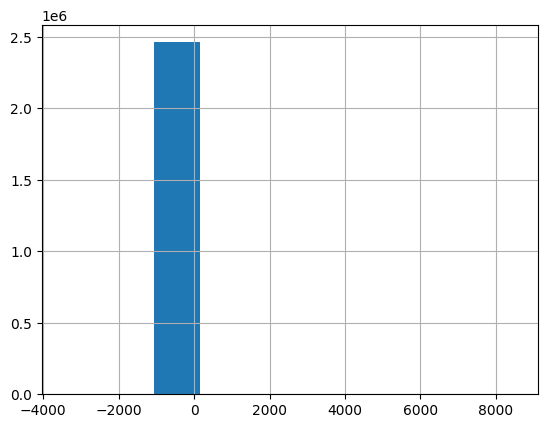

In [11]:
df_jan['duration'].hist()

In [12]:
df_jan_wo_outliers = df_jan[(df_jan['duration'] >= 1) & (df_jan['duration'] <= 60)]

<Axes: >

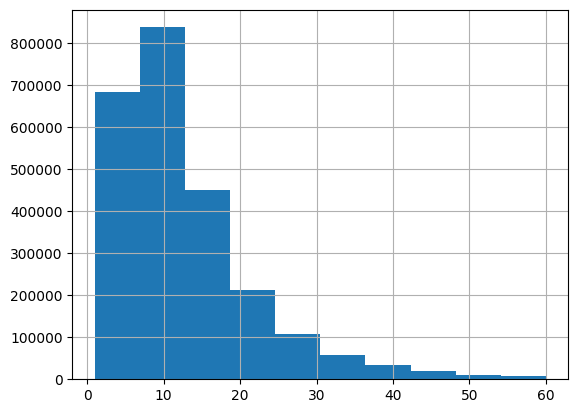

In [13]:
df_jan_wo_outliers['duration'].hist()

In [14]:
len(df_jan_wo_outliers)/len(df_jan)

0.9827547930522406

## Question 4

In [15]:
features = ['PULocationID', 'DOLocationID']
df_jan_wo_outliers[features] = df_jan_wo_outliers[features].astype(str)
df_jan_dict = df_jan_wo_outliers[features].to_dict(orient='records')

/tmp/ipykernel_443/2316520413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan_wo_outliers[features] = df_jan_wo_outliers[features].astype(str)


In [16]:
dv = DictVectorizer()
X_train = dv.fit_transform(df_jan_dict)
y_train = df_jan_wo_outliers['duration'].values

In [17]:
X_train.shape[1]

515

## Question 5

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)

In [19]:
mean_squared_error(y_train, y_train_pred, squared=False)

6.986190841034851

## Question 6

In [20]:
df_feb['duration'] = df_feb['tpep_dropoff_datetime'] - df_feb['tpep_pickup_datetime']
df_feb['duration'] = df_feb['duration'].apply(lambda dur: dur.total_seconds() / 60)
df_feb = df_feb[(df_feb['duration'] >= 1) & (df_feb['duration'] <= 60)]

In [21]:
df_feb[features] = df_feb[features].astype(str)
df_feb_dict = df_feb[features].to_dict(orient='records')

In [22]:
X_test = dv.transform(df_feb_dict)
y_test = df_feb['duration'].values

In [23]:
X_test

<2918187x515 sparse matrix of type '<class 'numpy.float64'>'
	with 5836368 stored elements in Compressed Sparse Row format>

In [25]:
y_test_pred = lr.predict(X_test)

In [26]:
mean_squared_error(y_test, y_test_pred, squared=False)

7.786408695263233